In [1]:
import pandas as pd
import numpy as np
import json, requests
import os

df=pd.read_csv('trip5.csv')
df.head(100) 

,商品排名名稱,營業價格,地址,官方網站
0,【50位】銀座木村屋總本店「あんぱん酒種 桜」,1個当たり 180円～,銀座駅周辺 銀座木村屋總本店,https://www.kimuraya-sohonten.co.jp/goods_cate...
1,【49位】D&Nコンフェクショナリー 「焼マシュマロ・タルト スモア（S’MORE）」,4個入 702円,羽田空港第2旅客ターミナル 1F ANA FESTA,https://www.anafesta.com/products/546
2,【48位】ラ･メゾン･デュ･ショコラ「ショコラ」,各種 675円,銀座駅 松屋銀座 B1F,http://www.lamaisonduchocolat.co.jp/ja_jp/
3,【47位】目黒東山 菓匠雅庵「わらび餅」,1折 734円,品川駅 エキュート品川サウス 1F,http://www.wagashi-miyabian.com
4,【46位】コロンバン「東京駅焼きショコラ」,5個入り 648円(税込),東京駅 グランスタ B1F,http://www.wagashi-miyabian.com
...,...,...,...,...
95,【55位】マミーズ･アン･スリール「パンダのアップルパイ」,1個 850円,上野駅 エキュート上野 3F,http://www.net-ekinaka.com/shop/g/gRNUNSWET184...
96,【54位】ボビーユーハイム「新・品川ロール」,"1個 1,512円",品川駅 エキュート品川 1F,https://www.juchheim.co.jp/brand/
97,【53位】Garrett Popcorn Shops（ギャレットポップコーンショップス）「T...,"5袋入り 1,800円",東京駅一番街 B1F,https://jpgarrettpopcorn.com/about/
98,【52位】ヨックモック「東京スカイツリー 缶 プティ シガール」,"16本 1,080円",東京スカイツリー 東京ソラマチ 4F,https://www.yokumoku.jp/yokumoku/cms/preview.php


In [2]:
# df.head()  #顯示出前n筆資料，預設值為5筆資料
# df.tail()  #顯示倒數n筆資料
# len(df)      #顯示資料總筆數
# df.dtypes    #顯示資料類型
# df.describe()#顯示統計數字(最大、最小、平均......等)
# df.rename(columns={'舊欄位名稱': '新欄位名稱'}) #修改欄位名稱
# df.columns   #顯示有哪些欄位
# df.T         #行與列轉置互換
# df.info()    #顯示資料的狀態與資訊
# df.iloc[0]   #顯示第n筆資料的所有數據 
# df.values
# df.columns
# pd.isnull(df)   #檢查DataFrame對象中的空值，並返回一個Boolean數組
# pd.notnull(df)   #檢查DataFrame對象中的非空值，並返回一個Boolean數組


In [3]:
df['商品排名名稱']

0                               【50位】銀座木村屋總本店「あんぱん酒種　桜」
1           【49位】D&Nコンフェクショナリー 「焼マシュマロ・タルト スモア（S’MORE）」
2                              【48位】ラ･メゾン･デュ･ショコラ「ショコラ」
3                                  【47位】目黒東山 菓匠雅庵「わらび餅」
4                                 【46位】コロンバン「東京駅焼きショコラ」
                            ...                        
95                        【55位】マミーズ･アン･スリール「パンダのアップルパイ」
96                               【54位】ボビーユーハイム「新・品川ロール」
97    【53位】Garrett Popcorn Shops（ギャレットポップコーンショップス）「T...
98                     【52位】ヨックモック「東京スカイツリー 缶 プティ シガール」
99                                  【51位】浅草 満願堂「栗入り芋きん」
Name: 商品排名名稱, Length: 100, dtype: object

In [4]:
df1=df['商品排名名稱'].str.split("位】", n = 1, expand = True)
df1[0] = df1[0].str.replace("【","")
df1

,0,1
0,50,銀座木村屋總本店「あんぱん酒種 桜」
1,49,D&Nコンフェクショナリー 「焼マシュマロ・タルト スモア（S’MORE）」
2,48,ラ･メゾン･デュ･ショコラ「ショコラ」
3,47,目黒東山 菓匠雅庵「わらび餅」
4,46,コロンバン「東京駅焼きショコラ」
...,...,...
95,55,マミーズ･アン･スリール「パンダのアップルパイ」
96,54,ボビーユーハイム「新・品川ロール」
97,53,Garrett Popcorn Shops（ギャレットポップコーンショップス）「TOKYO ...
98,52,ヨックモック「東京スカイツリー 缶 プティ シガール」


In [5]:
df1['知名度']=df1[0]
df1['商品名稱']=df1[1]
df1

,0,1,知名度,商品名稱
0,50,銀座木村屋總本店「あんぱん酒種 桜」,50,銀座木村屋總本店「あんぱん酒種 桜」
1,49,D&Nコンフェクショナリー 「焼マシュマロ・タルト スモア（S’MORE）」,49,D&Nコンフェクショナリー 「焼マシュマロ・タルト スモア（S’MORE）」
2,48,ラ･メゾン･デュ･ショコラ「ショコラ」,48,ラ･メゾン･デュ･ショコラ「ショコラ」
3,47,目黒東山 菓匠雅庵「わらび餅」,47,目黒東山 菓匠雅庵「わらび餅」
4,46,コロンバン「東京駅焼きショコラ」,46,コロンバン「東京駅焼きショコラ」
...,...,...,...,...
95,55,マミーズ･アン･スリール「パンダのアップルパイ」,55,マミーズ･アン･スリール「パンダのアップルパイ」
96,54,ボビーユーハイム「新・品川ロール」,54,ボビーユーハイム「新・品川ロール」
97,53,Garrett Popcorn Shops（ギャレットポップコーンショップス）「TOKYO ...,53,Garrett Popcorn Shops（ギャレットポップコーンショップス）「TOKYO ...
98,52,ヨックモック「東京スカイツリー 缶 プティ シガール」,52,ヨックモック「東京スカイツリー 缶 プティ シガール」


In [6]:
df1[0] = pd.to_numeric(df1[0])
df1.dtypes

0        int64
1       object
知名度     object
商品名稱    object
dtype: object

In [7]:
df1= df1.sort_values([0])
df1

,0,1,知名度,商品名稱
49,1,ザ・メープルマニア「メープルバタークッキー」,1,ザ・メープルマニア「メープルバタークッキー」
48,2,かみなり舎「ニューヨークパーフェクトチーズ」,2,かみなり舎「ニューヨークパーフェクトチーズ」
47,3,Butter Butler（バターバトラー）「バターフィナンシェ」,3,Butter Butler（バターバトラー）「バターフィナンシェ」
46,4,アンド ザ フリット「ドライフリット」,4,アンド ザ フリット「ドライフリット」
45,5,ねんりん家 銀座本店「はちみつ香マウントバーム」,5,ねんりん家 銀座本店「はちみつ香マウントバーム」
...,...,...,...,...
54,96,空いろ「つき」,96,空いろ「つき」
53,97,LUPICIA「ジャックと豆の木」,97,LUPICIA「ジャックと豆の木」
52,98,和楽紅屋（わらくべにや）「KAWAII パンダクッキー」,98,和楽紅屋（わらくべにや）「KAWAII パンダクッキー」
51,99,浅草花月堂「じゃんぼメロンパン」,99,浅草花月堂「じゃんぼメロンパン」


In [8]:
df1=df1.drop([0,1], axis=1)
df1

,知名度,商品名稱
49,1,ザ・メープルマニア「メープルバタークッキー」
48,2,かみなり舎「ニューヨークパーフェクトチーズ」
47,3,Butter Butler（バターバトラー）「バターフィナンシェ」
46,4,アンド ザ フリット「ドライフリット」
45,5,ねんりん家 銀座本店「はちみつ香マウントバーム」
...,...,...
54,96,空いろ「つき」
53,97,LUPICIA「ジャックと豆の木」
52,98,和楽紅屋（わらくべにや）「KAWAII パンダクッキー」
51,99,浅草花月堂「じゃんぼメロンパン」


In [9]:
df1['Types']=df1['商品名稱']
df1

,知名度,商品名稱,Types
49,1,ザ・メープルマニア「メープルバタークッキー」,ザ・メープルマニア「メープルバタークッキー」
48,2,かみなり舎「ニューヨークパーフェクトチーズ」,かみなり舎「ニューヨークパーフェクトチーズ」
47,3,Butter Butler（バターバトラー）「バターフィナンシェ」,Butter Butler（バターバトラー）「バターフィナンシェ」
46,4,アンド ザ フリット「ドライフリット」,アンド ザ フリット「ドライフリット」
45,5,ねんりん家 銀座本店「はちみつ香マウントバーム」,ねんりん家 銀座本店「はちみつ香マウントバーム」
...,...,...,...
54,96,空いろ「つき」,空いろ「つき」
53,97,LUPICIA「ジャックと豆の木」,LUPICIA「ジャックと豆の木」
52,98,和楽紅屋（わらくべにや）「KAWAII パンダクッキー」,和楽紅屋（わらくべにや）「KAWAII パンダクッキー」
51,99,浅草花月堂「じゃんぼメロンパン」,浅草花月堂「じゃんぼメロンパン」


In [10]:
df1.loc[[45,30,29,19,96,95,92,88,81,62,57,55,52,50,77], ['Types']] = "小蛋糕類"
df1.loc[[49,48,47,44,35,34,11,74,69,68,54], ['Types']] = "夾心餅乾類"
df1.loc[[46,28,27,26,25,20,9,98,93,90,79,75,72,67,89,83], ['Types']] = "餅乾類"
df1.loc[[40,33,31,97,86,80,64,59], ['Types']] = "果乾類"
df1.loc[[43,38,37,36,32,24,23,22,21,18,17,16,13,10,6,3,1,91,84,82,78,76,75,73,71,70,66,65,63,61,60,58,56,53,99,87,85], ['Types']] = "點心類"
df1.loc[[14,12,8,5,4,2], ['Types']] = "巧克力類"
df1.loc[[42,41,39,15,7,0,94,52,51], ['Types']] = "麵包類"
df1

,知名度,商品名稱,Types
49,1,ザ・メープルマニア「メープルバタークッキー」,夾心餅乾類
48,2,かみなり舎「ニューヨークパーフェクトチーズ」,夾心餅乾類
47,3,Butter Butler（バターバトラー）「バターフィナンシェ」,夾心餅乾類
46,4,アンド ザ フリット「ドライフリット」,餅乾類
45,5,ねんりん家 銀座本店「はちみつ香マウントバーム」,小蛋糕類
...,...,...,...
54,96,空いろ「つき」,夾心餅乾類
53,97,LUPICIA「ジャックと豆の木」,點心類
52,98,和楽紅屋（わらくべにや）「KAWAII パンダクッキー」,麵包類
51,99,浅草花月堂「じゃんぼメロンパン」,麵包類


In [11]:
dummies = pd.get_dummies(df1.Types)
dummies

,夾心餅乾類,小蛋糕類,巧克力類,果乾類,餅乾類,麵包類,點心類
49,1,0,0,0,0,0,0
48,1,0,0,0,0,0,0
47,1,0,0,0,0,0,0
46,0,0,0,0,1,0,0
45,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
54,1,0,0,0,0,0,0
53,0,0,0,0,0,0,1
52,0,0,0,0,0,1,0
51,0,0,0,0,0,1,0


In [12]:
merged = pd.concat([df1,dummies],axis='columns')
merged

,知名度,商品名稱,Types,夾心餅乾類,小蛋糕類,巧克力類,果乾類,餅乾類,麵包類,點心類
49,1,ザ・メープルマニア「メープルバタークッキー」,夾心餅乾類,1,0,0,0,0,0,0
48,2,かみなり舎「ニューヨークパーフェクトチーズ」,夾心餅乾類,1,0,0,0,0,0,0
47,3,Butter Butler（バターバトラー）「バターフィナンシェ」,夾心餅乾類,1,0,0,0,0,0,0
46,4,アンド ザ フリット「ドライフリット」,餅乾類,0,0,0,0,1,0,0
45,5,ねんりん家 銀座本店「はちみつ香マウントバーム」,小蛋糕類,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
54,96,空いろ「つき」,夾心餅乾類,1,0,0,0,0,0,0
53,97,LUPICIA「ジャックと豆の木」,點心類,0,0,0,0,0,0,1
52,98,和楽紅屋（わらくべにや）「KAWAII パンダクッキー」,麵包類,0,0,0,0,0,1,0
51,99,浅草花月堂「じゃんぼメロンパン」,麵包類,0,0,0,0,0,1,0


In [13]:
df2=df['營業價格'].str.split("円", n = 1, expand = True)
df2['Price'] = df2[0].replace("種"," ")
df2


,0,1,Price
0,1個当たり 180,～,1個当たり 180
1,4個入 702,,4個入 702
2,各種 675,,各種 675
3,1折 734,,1折 734
4,5個入り 648,(税込),5個入り 648
...,...,...,...
95,1個 850,,1個 850
96,"1個 1,512",,"1個 1,512"
97,"5袋入り 1,800",,"5袋入り 1,800"
98,"16本 1,080",,"16本 1,080"


In [14]:
df2=df2.drop([0,1], axis=1)
df2

,Price
0,1個当たり 180
1,4個入 702
2,各種 675
3,1折 734
4,5個入り 648
...,...
95,1個 850
96,"1個 1,512"
97,"5袋入り 1,800"
98,"16本 1,080"


In [15]:
import re 
df2=df2['Price'].apply(lambda s: re.findall(r'\d+', s.replace(',','')), 1 )
df2

0       [1, 180]
1       [4, 702]
2          [675]
3       [1, 734]
4       [5, 648]
         ...    
95      [1, 850]
96     [1, 1512]
97     [5, 1800]
98    [16, 1080]
99      [6, 778]
Name: Price, Length: 100, dtype: object

In [16]:
merged1 = pd.concat([merged, df2],axis='columns')
df3= merged1
df3

,知名度,商品名稱,Types,夾心餅乾類,小蛋糕類,巧克力類,果乾類,餅乾類,麵包類,點心類,Price
0,50,銀座木村屋總本店「あんぱん酒種 桜」,麵包類,0,0,0,0,0,1,0,"[1, 180]"
1,49,D&Nコンフェクショナリー 「焼マシュマロ・タルト スモア（S’MORE）」,點心類,0,0,0,0,0,0,1,"[4, 702]"
2,48,ラ･メゾン･デュ･ショコラ「ショコラ」,巧克力類,0,0,1,0,0,0,0,[675]
3,47,目黒東山 菓匠雅庵「わらび餅」,點心類,0,0,0,0,0,0,1,"[1, 734]"
4,46,コロンバン「東京駅焼きショコラ」,巧克力類,0,0,1,0,0,0,0,"[5, 648]"
...,...,...,...,...,...,...,...,...,...,...,...
95,55,マミーズ･アン･スリール「パンダのアップルパイ」,小蛋糕類,0,1,0,0,0,0,0,"[1, 850]"
96,54,ボビーユーハイム「新・品川ロール」,小蛋糕類,0,1,0,0,0,0,0,"[1, 1512]"
97,53,Garrett Popcorn Shops（ギャレットポップコーンショップス）「TOKYO ...,果乾類,0,0,0,1,0,0,0,"[5, 1800]"
98,52,ヨックモック「東京スカイツリー 缶 プティ シガール」,餅乾類,0,0,0,0,1,0,0,"[16, 1080]"


In [17]:
# df1[0] = pd.to_numeric(df1[0])
df3['知名度'] = pd.to_numeric(df3['知名度'])
df3.dtypes

知名度       int64
商品名稱     object
Types    object
夾心餅乾類     uint8
小蛋糕類      uint8
巧克力類      uint8
果乾類       uint8
餅乾類       uint8
麵包類       uint8
點心類       uint8
Price    object
dtype: object

In [18]:
df3= df3.sort_values("知名度", ascending=True)
df3

,知名度,商品名稱,Types,夾心餅乾類,小蛋糕類,巧克力類,果乾類,餅乾類,麵包類,點心類,Price
49,1,ザ・メープルマニア「メープルバタークッキー」,夾心餅乾類,1,0,0,0,0,0,0,"[9, 920]"
48,2,かみなり舎「ニューヨークパーフェクトチーズ」,夾心餅乾類,1,0,0,0,0,0,0,"[8, 1080]"
47,3,Butter Butler（バターバトラー）「バターフィナンシェ」,夾心餅乾類,1,0,0,0,0,0,0,"[4, 864]"
46,4,アンド ザ フリット「ドライフリット」,餅乾類,0,0,0,0,1,0,0,"[1, 450]"
45,5,ねんりん家 銀座本店「はちみつ香マウントバーム」,小蛋糕類,0,1,0,0,0,0,0,"[1, 756]"
...,...,...,...,...,...,...,...,...,...,...,...
54,96,空いろ「つき」,夾心餅乾類,1,0,0,0,0,0,0,"[8, 2096]"
53,97,LUPICIA「ジャックと豆の木」,點心類,0,0,0,0,0,0,1,"[50, 920]"
52,98,和楽紅屋（わらくべにや）「KAWAII パンダクッキー」,麵包類,0,0,0,0,0,1,0,"[8, 500]"
51,99,浅草花月堂「じゃんぼメロンパン」,麵包類,0,0,0,0,0,1,0,"[5, 1000]"


In [19]:
x = df3['Price']
print(x)
a = []
for i in x:
    a.append(i[-1])
print(a)


49     [9, 920]
48    [8, 1080]
47     [4, 864]
46     [1, 450]
45     [1, 756]
        ...    
54    [8, 2096]
53    [50, 920]
52     [8, 500]
51    [5, 1000]
50     [5, 648]
Name: Price, Length: 100, dtype: object
['920', '1080', '864', '450', '756', '540', '1000', '210', '1080', '340', '399', '1296', '324', '330', '1080', '240', '380', '216', '378', '778', '486', '2160', '617', '1080', '626', '216', '600', '1100', '1512', '648', '1944', '864', '648', '1250', '566', '414', '648', '1404', '1080', '680', '1250', '702', '432', '1998', '1620', '648', '734', '675', '702', '180', '778', '1080', '1800', '1512', '850', '432', '648', '2484', '1080', '450', '580', '972', '540', '1080', '1188', '378', '1080', '580', '411', '702', '1080', '840', '702', '180', '594', '680', '252', '480', '550', '972', '864', '1300', '1500', '216', '1080', '800', '401', '515', '124', '573', '370', '756', '1080', '648', '950', '2096', '920', '500', '1000', '648']


In [20]:
df3["price"]=df3["Price"]
df3["price"] = a
df3

,知名度,商品名稱,Types,夾心餅乾類,小蛋糕類,巧克力類,果乾類,餅乾類,麵包類,點心類,Price,price
49,1,ザ・メープルマニア「メープルバタークッキー」,夾心餅乾類,1,0,0,0,0,0,0,"[9, 920]",920
48,2,かみなり舎「ニューヨークパーフェクトチーズ」,夾心餅乾類,1,0,0,0,0,0,0,"[8, 1080]",1080
47,3,Butter Butler（バターバトラー）「バターフィナンシェ」,夾心餅乾類,1,0,0,0,0,0,0,"[4, 864]",864
46,4,アンド ザ フリット「ドライフリット」,餅乾類,0,0,0,0,1,0,0,"[1, 450]",450
45,5,ねんりん家 銀座本店「はちみつ香マウントバーム」,小蛋糕類,0,1,0,0,0,0,0,"[1, 756]",756
...,...,...,...,...,...,...,...,...,...,...,...,...
54,96,空いろ「つき」,夾心餅乾類,1,0,0,0,0,0,0,"[8, 2096]",2096
53,97,LUPICIA「ジャックと豆の木」,點心類,0,0,0,0,0,0,1,"[50, 920]",920
52,98,和楽紅屋（わらくべにや）「KAWAII パンダクッキー」,麵包類,0,0,0,0,0,1,0,"[8, 500]",500
51,99,浅草花月堂「じゃんぼメロンパン」,麵包類,0,0,0,0,0,1,0,"[5, 1000]",1000


In [21]:
df3=df3.drop(["商品名稱", "Types", "Price"], axis=1)
df3

,知名度,夾心餅乾類,小蛋糕類,巧克力類,果乾類,餅乾類,麵包類,點心類,price
49,1,1,0,0,0,0,0,0,920
48,2,1,0,0,0,0,0,0,1080
47,3,1,0,0,0,0,0,0,864
46,4,0,0,0,0,1,0,0,450
45,5,0,1,0,0,0,0,0,756
...,...,...,...,...,...,...,...,...,...
54,96,1,0,0,0,0,0,0,2096
53,97,0,0,0,0,0,0,1,920
52,98,0,0,0,0,0,1,0,500
51,99,0,0,0,0,0,1,0,1000


In [22]:
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# from sklearn.cluster import KMeans

# X_train = np.array(df3)
# X_train
# X_scaled = preprocessing.scale(X_train)
# X_scaled

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
data = df3
scaler = MinMaxScaler()
print(scaler.fit(data))
# X_train = np.array(df3)
# X_train

MinMaxScaler(copy=True, feature_range=(0, 1))


In [24]:
print(scaler.data_max_)
print(scaler.transform(data))

[1.000e+02 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 2.484e+03]
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.33728814]
 [0.01010101 1.         0.         0.         0.         0.
  0.         0.         0.40508475]
 [0.02020202 1.         0.         0.         0.         0.
  0.         0.         0.31355932]
 [0.03030303 0.         0.         0.         0.         1.
  0.         0.         0.13813559]
 [0.04040404 0.         1.         0.         0.         0.
  0.         0.         0.26779661]
 [0.05050505 1.         0.         0.         0.         0.
  0.         0.         0.17627119]
 [0.06060606 0.         0.         0.         0.         0.
  0.         1.         0.37118644]
 [0.07070707 0.         0.         0.         0.         0.
  1.         0.         0.03644068]
 [0.08080808 0.         0.         0.         0.         0.
  1.         0.         0.40508475]
 [0.09090909 0.         0.         0.      

In [25]:
df4 = pd.DataFrame(scaler.transform(data)) 
df4

,0,1,2,3,4,5,6,7,8
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.337288
1,0.010101,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.405085
2,0.020202,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.313559
3,0.030303,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.138136
4,0.040404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.267797
...,...,...,...,...,...,...,...,...,...
95,0.959596,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.835593
96,0.969697,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.337288
97,0.979798,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.159322
98,0.989899,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.371186


In [26]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)


In [27]:
cluster.fit(df4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
df4["label"] = cluster.labels_
df4

,0,1,2,3,4,5,6,7,8,label
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.337288,1
1,0.010101,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.405085,1
2,0.020202,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.313559,1
3,0.030303,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.138136,1
4,0.040404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.267797,0
...,...,...,...,...,...,...,...,...,...,...
95,0.959596,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.835593,1
96,0.969697,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.337288,2
97,0.979798,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.159322,1
98,0.989899,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.371186,1


In [29]:
cluster.cluster_centers_

array([[ 5.84415584e-01, -2.77555756e-17,  1.00000000e+00,
        -2.08166817e-17,  1.38777878e-17,  2.77555756e-17,
         0.00000000e+00, -5.55111512e-17,  3.73849879e-01],
       [ 4.41146155e-01,  2.24489796e-01,  1.11022302e-16,
         1.22448980e-01,  1.63265306e-01,  3.06122449e-01,
         1.83673469e-01,  2.22044605e-16,  2.98417503e-01],
       [ 5.46000546e-01,  4.16333634e-17,  2.77555756e-17,
        -4.16333634e-17, -2.77555756e-17, -8.32667268e-17,
         2.77555756e-17,  1.00000000e+00,  2.54008246e-01]])

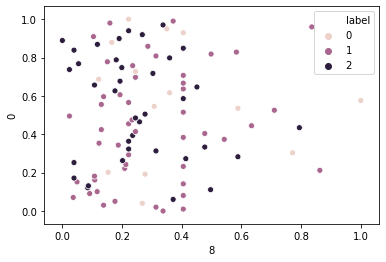

In [30]:
# 知名度   price
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.scatterplot(x=df4[8],
                y=df4[0],
                hue=df4["label"])
# plt.xlabel("petal length")

In [31]:
from sklearn.metrics import silhouette_score
x = []
y = []
for k in range(2, 5):
    cluster = KMeans(n_clusters=k)
    cluster.fit(df4)
    s = silhouette_score(df4, cluster.labels_)
    x.append(k)
    y.append(s)
print("K choice:", x)
print("Score:", y)

K choice: [2, 3, 4]
Score: [0.45421343488604565, 0.5270565480001265, 0.5495637749475063]


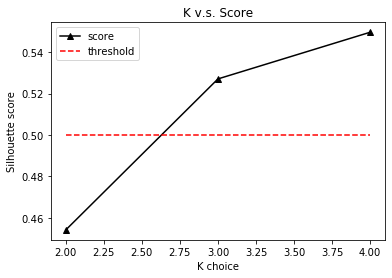

In [32]:
threshold = [0.5] * len(x)
plt.title("K v.s. Score")
plt.xlabel("K choice")
plt.ylabel("Silhouette score")
p1, = plt.plot(x, y, "^-k", label="score")
p2, = plt.plot(x, threshold, "--r", label="threshold")
plt.legend(handles=[p1, p2])

In [33]:
# df.to_csv("trip3.csv", encoding="utf-8", index=False)

In [34]:
df=df.head(100).drop(["營業價格", "商品排名名稱"], axis=1)
df

,地址,官方網站
0,銀座駅周辺 銀座木村屋總本店,https://www.kimuraya-sohonten.co.jp/goods_cate...
1,羽田空港第2旅客ターミナル 1F ANA FESTA,https://www.anafesta.com/products/546
2,銀座駅 松屋銀座 B1F,http://www.lamaisonduchocolat.co.jp/ja_jp/
3,品川駅 エキュート品川サウス 1F,http://www.wagashi-miyabian.com
4,東京駅 グランスタ B1F,http://www.wagashi-miyabian.com
...,...,...
95,上野駅 エキュート上野 3F,http://www.net-ekinaka.com/shop/g/gRNUNSWET184...
96,品川駅 エキュート品川 1F,https://www.juchheim.co.jp/brand/
97,東京駅一番街 B1F,https://jpgarrettpopcorn.com/about/
98,東京スカイツリー 東京ソラマチ 4F,https://www.yokumoku.jp/yokumoku/cms/preview.php


In [35]:
df3=df3.drop(["知名度", "夾心餅乾類", "小蛋糕類", "巧克力類", "果乾類", "餅乾類", "麵包類", "點心類"], axis=1)
df3

,price
49,920
48,1080
47,864
46,450
45,756
...,...
54,2096
53,920
52,500
51,1000


In [36]:
merged2 = pd.concat([df3, df],axis='columns')
df3_1 = merged2
df3_1

,price,地址,官方網站
0,180,銀座駅周辺 銀座木村屋總本店,https://www.kimuraya-sohonten.co.jp/goods_cate...
1,702,羽田空港第2旅客ターミナル 1F ANA FESTA,https://www.anafesta.com/products/546
2,675,銀座駅 松屋銀座 B1F,http://www.lamaisonduchocolat.co.jp/ja_jp/
3,734,品川駅 エキュート品川サウス 1F,http://www.wagashi-miyabian.com
4,648,東京駅 グランスタ B1F,http://www.wagashi-miyabian.com
...,...,...,...
95,850,上野駅 エキュート上野 3F,http://www.net-ekinaka.com/shop/g/gRNUNSWET184...
96,1512,品川駅 エキュート品川 1F,https://www.juchheim.co.jp/brand/
97,1800,東京駅一番街 B1F,https://jpgarrettpopcorn.com/about/
98,1080,東京スカイツリー 東京ソラマチ 4F,https://www.yokumoku.jp/yokumoku/cms/preview.php


In [37]:
merged3 = pd.concat([df1, df3_1],axis='columns')
df5 = merged3
df5

,知名度,商品名稱,Types,price,地址,官方網站
0,50,銀座木村屋總本店「あんぱん酒種 桜」,麵包類,180,銀座駅周辺 銀座木村屋總本店,https://www.kimuraya-sohonten.co.jp/goods_cate...
1,49,D&Nコンフェクショナリー 「焼マシュマロ・タルト スモア（S’MORE）」,點心類,702,羽田空港第2旅客ターミナル 1F ANA FESTA,https://www.anafesta.com/products/546
2,48,ラ･メゾン･デュ･ショコラ「ショコラ」,巧克力類,675,銀座駅 松屋銀座 B1F,http://www.lamaisonduchocolat.co.jp/ja_jp/
3,47,目黒東山 菓匠雅庵「わらび餅」,點心類,734,品川駅 エキュート品川サウス 1F,http://www.wagashi-miyabian.com
4,46,コロンバン「東京駅焼きショコラ」,巧克力類,648,東京駅 グランスタ B1F,http://www.wagashi-miyabian.com
...,...,...,...,...,...,...
95,55,マミーズ･アン･スリール「パンダのアップルパイ」,小蛋糕類,850,上野駅 エキュート上野 3F,http://www.net-ekinaka.com/shop/g/gRNUNSWET184...
96,54,ボビーユーハイム「新・品川ロール」,小蛋糕類,1512,品川駅 エキュート品川 1F,https://www.juchheim.co.jp/brand/
97,53,Garrett Popcorn Shops（ギャレットポップコーンショップス）「TOKYO ...,果乾類,1800,東京駅一番街 B1F,https://jpgarrettpopcorn.com/about/
98,52,ヨックモック「東京スカイツリー 缶 プティ シガール」,餅乾類,1080,東京スカイツリー 東京ソラマチ 4F,https://www.yokumoku.jp/yokumoku/cms/preview.php


In [38]:
df5['ranking']=df5["知名度"]
df5['souvenir']=df5["商品名稱"]
df5['address']=df5["地址"]
df5['url']=df5["官方網站"]
df5

,知名度,商品名稱,Types,price,地址,官方網站,ranking,souvenir,address,url
0,50,銀座木村屋總本店「あんぱん酒種 桜」,麵包類,180,銀座駅周辺 銀座木村屋總本店,https://www.kimuraya-sohonten.co.jp/goods_cate...,50,銀座木村屋總本店「あんぱん酒種 桜」,銀座駅周辺 銀座木村屋總本店,https://www.kimuraya-sohonten.co.jp/goods_cate...
1,49,D&Nコンフェクショナリー 「焼マシュマロ・タルト スモア（S’MORE）」,點心類,702,羽田空港第2旅客ターミナル 1F ANA FESTA,https://www.anafesta.com/products/546,49,D&Nコンフェクショナリー 「焼マシュマロ・タルト スモア（S’MORE）」,羽田空港第2旅客ターミナル 1F ANA FESTA,https://www.anafesta.com/products/546
2,48,ラ･メゾン･デュ･ショコラ「ショコラ」,巧克力類,675,銀座駅 松屋銀座 B1F,http://www.lamaisonduchocolat.co.jp/ja_jp/,48,ラ･メゾン･デュ･ショコラ「ショコラ」,銀座駅 松屋銀座 B1F,http://www.lamaisonduchocolat.co.jp/ja_jp/
3,47,目黒東山 菓匠雅庵「わらび餅」,點心類,734,品川駅 エキュート品川サウス 1F,http://www.wagashi-miyabian.com,47,目黒東山 菓匠雅庵「わらび餅」,品川駅 エキュート品川サウス 1F,http://www.wagashi-miyabian.com
4,46,コロンバン「東京駅焼きショコラ」,巧克力類,648,東京駅 グランスタ B1F,http://www.wagashi-miyabian.com,46,コロンバン「東京駅焼きショコラ」,東京駅 グランスタ B1F,http://www.wagashi-miyabian.com
...,...,...,...,...,...,...,...,...,...,...
95,55,マミーズ･アン･スリール「パンダのアップルパイ」,小蛋糕類,850,上野駅 エキュート上野 3F,http://www.net-ekinaka.com/shop/g/gRNUNSWET184...,55,マミーズ･アン･スリール「パンダのアップルパイ」,上野駅 エキュート上野 3F,http://www.net-ekinaka.com/shop/g/gRNUNSWET184...
96,54,ボビーユーハイム「新・品川ロール」,小蛋糕類,1512,品川駅 エキュート品川 1F,https://www.juchheim.co.jp/brand/,54,ボビーユーハイム「新・品川ロール」,品川駅 エキュート品川 1F,https://www.juchheim.co.jp/brand/
97,53,Garrett Popcorn Shops（ギャレットポップコーンショップス）「TOKYO ...,果乾類,1800,東京駅一番街 B1F,https://jpgarrettpopcorn.com/about/,53,Garrett Popcorn Shops（ギャレットポップコーンショップス）「TOKYO ...,東京駅一番街 B1F,https://jpgarrettpopcorn.com/about/
98,52,ヨックモック「東京スカイツリー 缶 プティ シガール」,餅乾類,1080,東京スカイツリー 東京ソラマチ 4F,https://www.yokumoku.jp/yokumoku/cms/preview.php,52,ヨックモック「東京スカイツリー 缶 プティ シガール」,東京スカイツリー 東京ソラマチ 4F,https://www.yokumoku.jp/yokumoku/cms/preview.php


In [39]:
df5=df5.drop(["知名度", "商品名稱", "地址", "官方網站"], axis=1)
df5

,Types,price,ranking,souvenir,address,url
0,麵包類,180,50,銀座木村屋總本店「あんぱん酒種 桜」,銀座駅周辺 銀座木村屋總本店,https://www.kimuraya-sohonten.co.jp/goods_cate...
1,點心類,702,49,D&Nコンフェクショナリー 「焼マシュマロ・タルト スモア（S’MORE）」,羽田空港第2旅客ターミナル 1F ANA FESTA,https://www.anafesta.com/products/546
2,巧克力類,675,48,ラ･メゾン･デュ･ショコラ「ショコラ」,銀座駅 松屋銀座 B1F,http://www.lamaisonduchocolat.co.jp/ja_jp/
3,點心類,734,47,目黒東山 菓匠雅庵「わらび餅」,品川駅 エキュート品川サウス 1F,http://www.wagashi-miyabian.com
4,巧克力類,648,46,コロンバン「東京駅焼きショコラ」,東京駅 グランスタ B1F,http://www.wagashi-miyabian.com
...,...,...,...,...,...,...
95,小蛋糕類,850,55,マミーズ･アン･スリール「パンダのアップルパイ」,上野駅 エキュート上野 3F,http://www.net-ekinaka.com/shop/g/gRNUNSWET184...
96,小蛋糕類,1512,54,ボビーユーハイム「新・品川ロール」,品川駅 エキュート品川 1F,https://www.juchheim.co.jp/brand/
97,果乾類,1800,53,Garrett Popcorn Shops（ギャレットポップコーンショップス）「TOKYO ...,東京駅一番街 B1F,https://jpgarrettpopcorn.com/about/
98,餅乾類,1080,52,ヨックモック「東京スカイツリー 缶 プティ シガール」,東京スカイツリー 東京ソラマチ 4F,https://www.yokumoku.jp/yokumoku/cms/preview.php


In [40]:
# df5['address_1'] = df5['address'].replace(" ","的")
# df5

,Types,price,ranking,souvenir,address,url,address_1
0,麵包類,180,50,銀座木村屋總本店「あんぱん酒種 桜」,銀座駅周辺 銀座木村屋總本店,https://www.kimuraya-sohonten.co.jp/goods_cate...,銀座駅周辺 銀座木村屋總本店
1,點心類,702,49,D&Nコンフェクショナリー 「焼マシュマロ・タルト スモア（S’MORE）」,羽田空港第2旅客ターミナル 1F ANA FESTA,https://www.anafesta.com/products/546,羽田空港第2旅客ターミナル 1F ANA FESTA
2,巧克力類,675,48,ラ･メゾン･デュ･ショコラ「ショコラ」,銀座駅 松屋銀座 B1F,http://www.lamaisonduchocolat.co.jp/ja_jp/,銀座駅 松屋銀座 B1F
3,點心類,734,47,目黒東山 菓匠雅庵「わらび餅」,品川駅 エキュート品川サウス 1F,http://www.wagashi-miyabian.com,品川駅 エキュート品川サウス 1F
4,巧克力類,648,46,コロンバン「東京駅焼きショコラ」,東京駅 グランスタ B1F,http://www.wagashi-miyabian.com,東京駅 グランスタ B1F
...,...,...,...,...,...,...,...
95,小蛋糕類,850,55,マミーズ･アン･スリール「パンダのアップルパイ」,上野駅 エキュート上野 3F,http://www.net-ekinaka.com/shop/g/gRNUNSWET184...,上野駅 エキュート上野 3F
96,小蛋糕類,1512,54,ボビーユーハイム「新・品川ロール」,品川駅 エキュート品川 1F,https://www.juchheim.co.jp/brand/,品川駅 エキュート品川 1F
97,果乾類,1800,53,Garrett Popcorn Shops（ギャレットポップコーンショップス）「TOKYO ...,東京駅一番街 B1F,https://jpgarrettpopcorn.com/about/,東京駅一番街 B1F
98,餅乾類,1080,52,ヨックモック「東京スカイツリー 缶 プティ シガール」,東京スカイツリー 東京ソラマチ 4F,https://www.yokumoku.jp/yokumoku/cms/preview.php,東京スカイツリー 東京ソラマチ 4F


In [41]:
# df5.to_csv("trip4.csv", encoding="utf-8", index=False)